# 'Kwanza Tukule' Sales Data Analysis and Insights.
*By Muniu Paul ™️*

## 1. Business Understanding.
### Overview.
Kwanza Tukule is a cashless B2B business that leverages technology and an efficient supply chain to ensure accessible and affordable nutritious food for the many in Kenya. By focusing on street food vendors and kiosks, which serve as critical food access points in low-income areas, Kwanza Tukule addresses the challenges of affordability and availability of ingredients. The company sources essential products directly from manufacturers and delivers them through last-mile distribution, cutting out intermediaries and offering products at affordable rates to vendors, thus reducing food costs for the local population.

### Problem Statement.
This project aims to analyze anonymized sales data to derive actionable insights that will help Kwanza Tukule optimize its operations, better serve its vendors, and improve access to affordable food. The insights will focus on understanding sales trends, customer behavior, and inventory management to inform business decisions.

### Objectives.
1. Data Cleaning and Preparation: Cleaning and preparing the dataset.
2. Sales Analysis: Analyzing trends and performance to understand the business context.
3. Forecasting and Segmentation: Performing advanced analysis like forecasting and customer segmentation.
4. Recommendations: Providing actionable recommendations to improve operations.
5. Dashboard Creation: Creating an interactive dashboard that summarizes your findings.

### Stakeholder : 
**Kwanza Tukule Foods Limited** - A B2B company focused on providing accessible, affordable, and nutritious food to street food vendors and kiosks in low-income areas of Kenya.

# 2. Data Understanding.
The dataset provided by **Kwanza Tukule** contains anonymized sales data. You can access it [here](dataset/Case%20Study%20Data%20-%20Read%20Only%20-%20case_study_data_2025-01-16T06_49_12.19881Z.csv).

##### Importing packages/libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# View the first 5 rows
data = pd.read_csv('dataset/Case Study Data.csv')
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


The dataset consists of 333,405 rows and 7 columns. The features include:

`DATE`: The date of the transaction.

`ANONYMIZED CATEGORY`: The category of the product sold.

`ANONYMIZED PRODUCT`: The specific product that was sold.

`ANONYMIZED BUSINESS`: The business that made the sale.

`ANONYMIZED LOCATION`: The location of the transaction.

`QUANTITY`: The number of units sold in the transaction.

`UNIT PRICE`: The price per unit of the product.

# SECTION 1: Data Cleaning and Preparation.

### (a) Data Quality Assessment.

#### i. Check for Missing values

In [4]:
missing_values = data.isnull().sum()
missing_values

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

**Action Taken :** 
- Given that the rest of the dataset had no missing values, I decided to drop the rows with missing values in the 'UNIT PRICE' column to avoid introducing bias into the analysis.

In [5]:
data.dropna(subset=['UNIT PRICE'], inplace=True)

In [6]:
# Verify that no missing values have remained
missing_values_after = data.isnull().sum()
missing_values_after

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

#### ii. Check for Dublicates

In [7]:
data.duplicated().sum()

3524

**Action Taken :**
- Discovered that 3,524 
duplicate rows are present. Duplicate rows can skew analysis and lead to inaccurate insights, so it was essential to address this issue by dropping them.

In [8]:
# dropping duplicates
data.drop_duplicates(inplace=True)

In [9]:
# counter-check duplicates
data.duplicated().sum()

0

### iii. check for inconsistent data types.

In [10]:
# check for datatypes
data.dtypes

DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object

**Action Taken**
- Upon inspecting the data types:
The DATE column is stored as an object, ought be converted to a datetime format and the UNIT PRICE column is stored as an object this needs to be converted to a numeric format (float).

In [11]:
# convert the date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# convert the Unit Price column to float dtype
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace("," , "").astype(float)

### (b) Feature Engineering.
##### i. Creating the "Month-Year" Column.
This part involves creating a new column called Month-Year. We'll extract the month and year from the DATE column.

In [12]:
# Create 'Month-Year' column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

In [13]:
# Check the new column
data.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024


### (c) Data Validation.
*-* This process involves verifying if the data values make sense within the project's context. Essentially, it involves whether the data meets specific criteria before it is used.

##### i. Outliers Detection
*-* Used boxplots and summary statistics to identify unusually high or low values.

In [14]:
data.describe()

,DATE,QUANTITY,UNIT PRICE
count,329873,329873.000000,329873.000000
mean,2024-07-18 11:47:54.002236672,2.321469,2319.016579
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767697,1582.578700


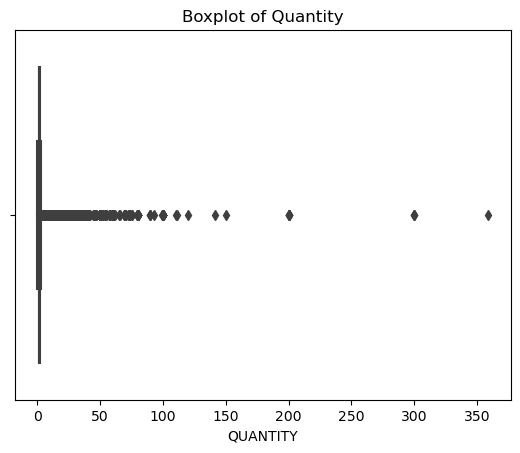

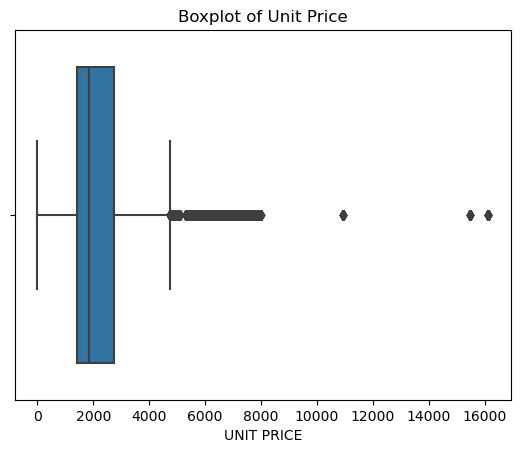

In [15]:
# Check for outliers in QUANTITY
sns.boxplot(x=data['QUANTITY'])
plt.title('Boxplot of Quantity')
plt.show()

# Check for outliers in UNIT PRICE
sns.boxplot(x=data['UNIT PRICE'])
plt.title('Boxplot of Unit Price')
plt.show();

**Action Taken :**  
- No outliers were removed, as they represent valid observations and provide valuable insights into the dataset's range and variability.

##### ii. Date Validation  
*-* Verifying if the DATE column has valid entries and ensure they all fall within a reasonable range.

In [16]:
# Check for invalid dates
print(f"Min date: {data['DATE'].min()}, Max date: {data['DATE'].max()}")

Min date: 2024-01-01 05:54:00, Max date: 2024-12-31 18:24:00


##### iii. Consistency in Categorical Data
*-* To ensure consistency across the dataset, we created a function that standardizes specified columns by removing extra spaces and converting text to lowercase. This is applied to the following columns: 

&#10003; ANONYMIZED CATEGORY 

&#10003; ANONYMIZED PRODUCT 

&#10003; ANONYMIZED BUSINESS

&#10003; ANONYMIZED LOCATION

In [17]:
# Helper function
def clean_column(df, columns):
    """
    Cleans and standardizes specified columns.
    """
    for col in columns:
        df[col] = df[col].str.strip().str.lower()
    return df

columns_to_clean = ['ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION']
df = clean_column(data, columns_to_clean)
data.head(3)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,category-120,product-4156,business-de42,location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,category-121,product-49bd,business-de42,location-1ba8,1,3670.0,August 2024


In [18]:
# Setting a custom format for all float columns
pd.set_option('display.float_format', '{:,.2f}'.format)

# re-confirming for missing values, duplcates and datatypes
print(f"{data.isnull().sum()}\n")
print(f"DUPLICATES = {data.duplicated().sum()}\n")
print(f"***DATA TYPES***\n{data.dtypes}")


DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
dtype: int64

DUPLICATES = 0

***DATA TYPES***
DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
Month-Year                     object
dtype: object


In [19]:
data.sample(5, random_state=42)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
72578,2024-05-27 13:57:00,category-78,product-b409,business-c96d,location-d32a,1,750.00,May 2024
59770,2024-04-25 16:36:00,category-75,product-23fd,business-2590,location-0451,1,"4,078.00",April 2024
160669,2024-07-16 20:41:00,category-119,product-66e0,business-fe3d,location-1ba8,2,"1,380.00",July 2024
123576,2024-10-10 17:20:00,category-119,product-e98d,business-4d9c,location-689f,1,"1,450.00",October 2024
90984,2024-10-06 21:54:00,category-76,product-e805,business-bc52,location-3fc0,2,"5,300.00",October 2024


> Done performing data cleaning, our dataset is now well-prepared for analysis.

# SECTION 2: Exploratory Data Analysis.

### (a) Sales Overview

**i. Total Quantity and Value grouped by: Anonymized Category and Anonymized Business.**

In [20]:
# calculating the Value column(Value = Quantity × Unit Price)
data["VALUE"] = data["QUANTITY"] * data["UNIT PRICE"]
data.head(2)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,VALUE
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.00,August 2024,850.00
1,2024-08-18 21:32:00,category-120,product-4156,business-de42,location-1ba8,2,"1,910.00",August 2024,"3,820.00"


In [21]:
# Group by Anonymized Category
category_group = data.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

# Group by Anonymized Business
business_group = data.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum', 'VALUE': 'sum'}).reset_index()

In [22]:
# view the category_group
print(f'Category_group_shape: {category_group.shape}')
category_group.head(5)

Category_group_shape: (46, 3)


,ANONYMIZED CATEGORY,QUANTITY,VALUE
0,category-100,76824,"134,902,751.00"
1,category-101,19564,"35,577,822.00"
2,category-102,1786,"464,463.00"
3,category-104,1217,"1,557,598.00"
4,category-105,1579,"2,690,719.00"


In [23]:
# view the business_group
print(f'Business_group_shape: {business_group.shape}')
business_group.head(5)

Business_group_shape: (4800, 3)


,ANONYMIZED BUSINESS,QUANTITY,VALUE
0,business-0000,8,"10,445.00"
1,business-0005,1,"2,645.00"
2,business-0029,26,"77,340.00"
3,business-003d,98,"221,761.00"
4,business-0072,127,"225,056.00"


**ii. Visuals for the above findings.**

- Category Group

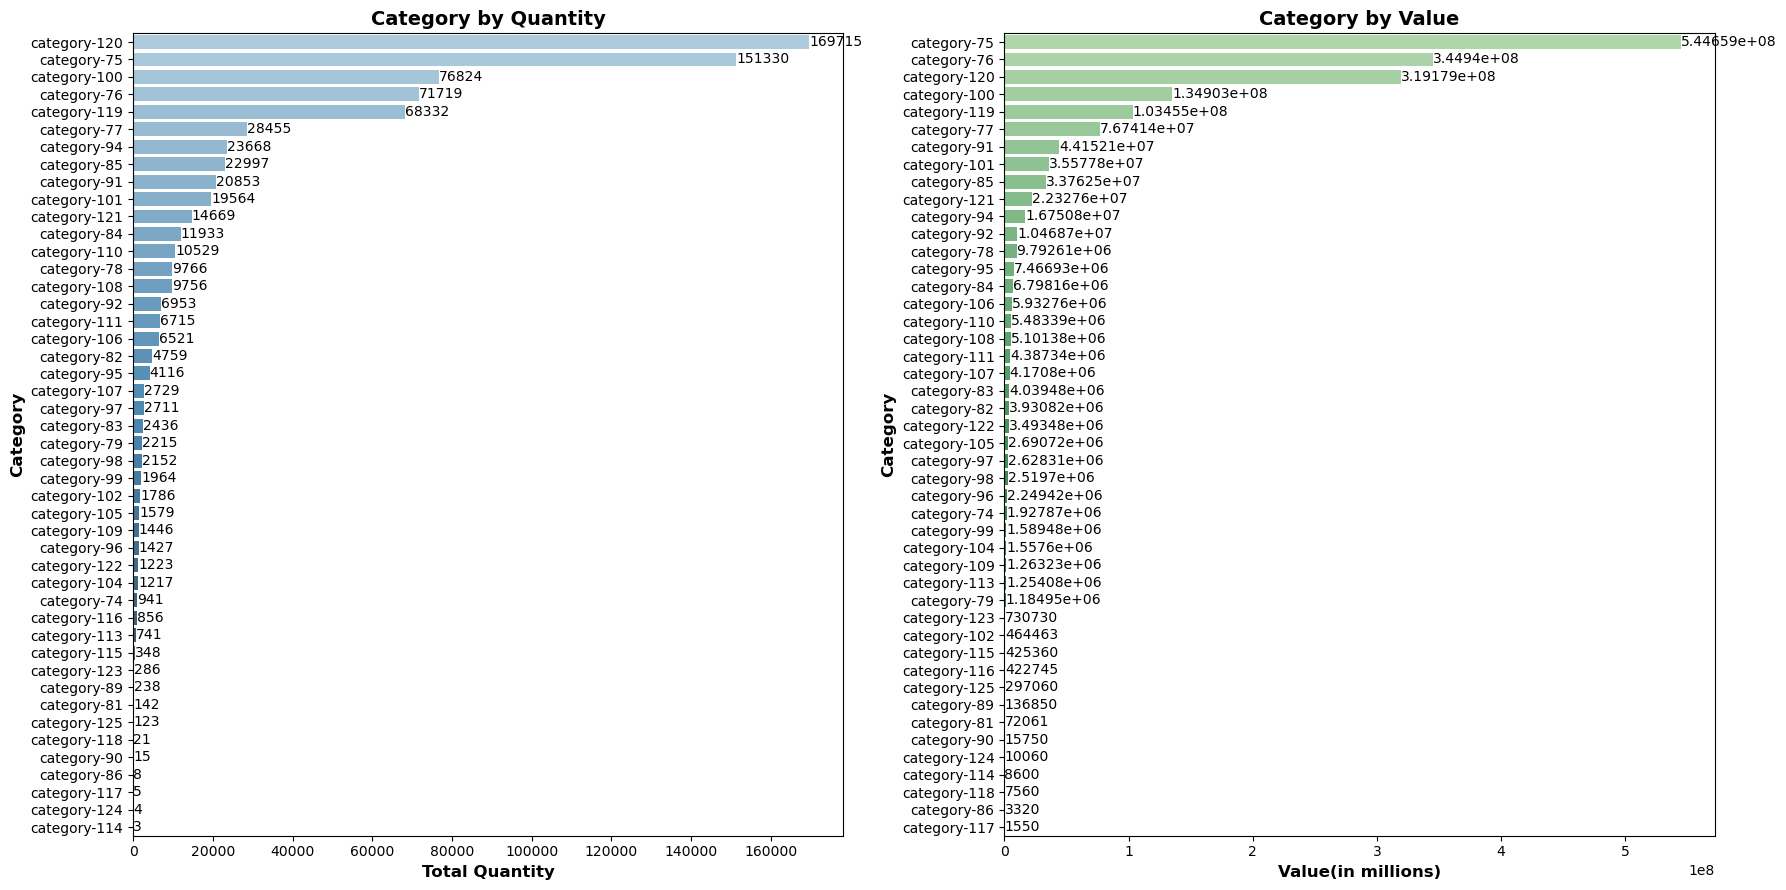

In [24]:
# Sort category_group by Quantity and Value
category_group_sorted_by_quantity = category_group.sort_values('QUANTITY', ascending=False)
category_group_sorted_by_value = category_group.sort_values('VALUE', ascending=False)

# Plot for Quantity and Value
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plot for Quantity
sns.barplot(data=category_group_sorted_by_quantity, y='ANONYMIZED CATEGORY', x='QUANTITY', ax=axes[0], palette="Blues_d")
axes[0].set_title("Category by Quantity", fontsize=14, weight='bold')
axes[0].set_xlabel("Total Quantity", fontsize=12, weight='bold')
axes[0].set_ylabel("Category", fontsize=12, weight='bold')
axes[0].bar_label(axes[0].containers[0], fontsize=10)

# Plot for Value
sns.barplot(data=category_group_sorted_by_value, y='ANONYMIZED CATEGORY', x='VALUE', ax=axes[1], palette="Greens_d")
axes[1].set_title("Category by Value", fontsize=14, weight='bold')
axes[1].set_xlabel("Value(in millions)", fontsize=12, weight='bold')
axes[1].set_ylabel("Category", fontsize=12, weight='bold')
axes[1].bar_label(axes[1].containers[0], fontsize=10)

plt.tight_layout()
plt.show();

- Business Group

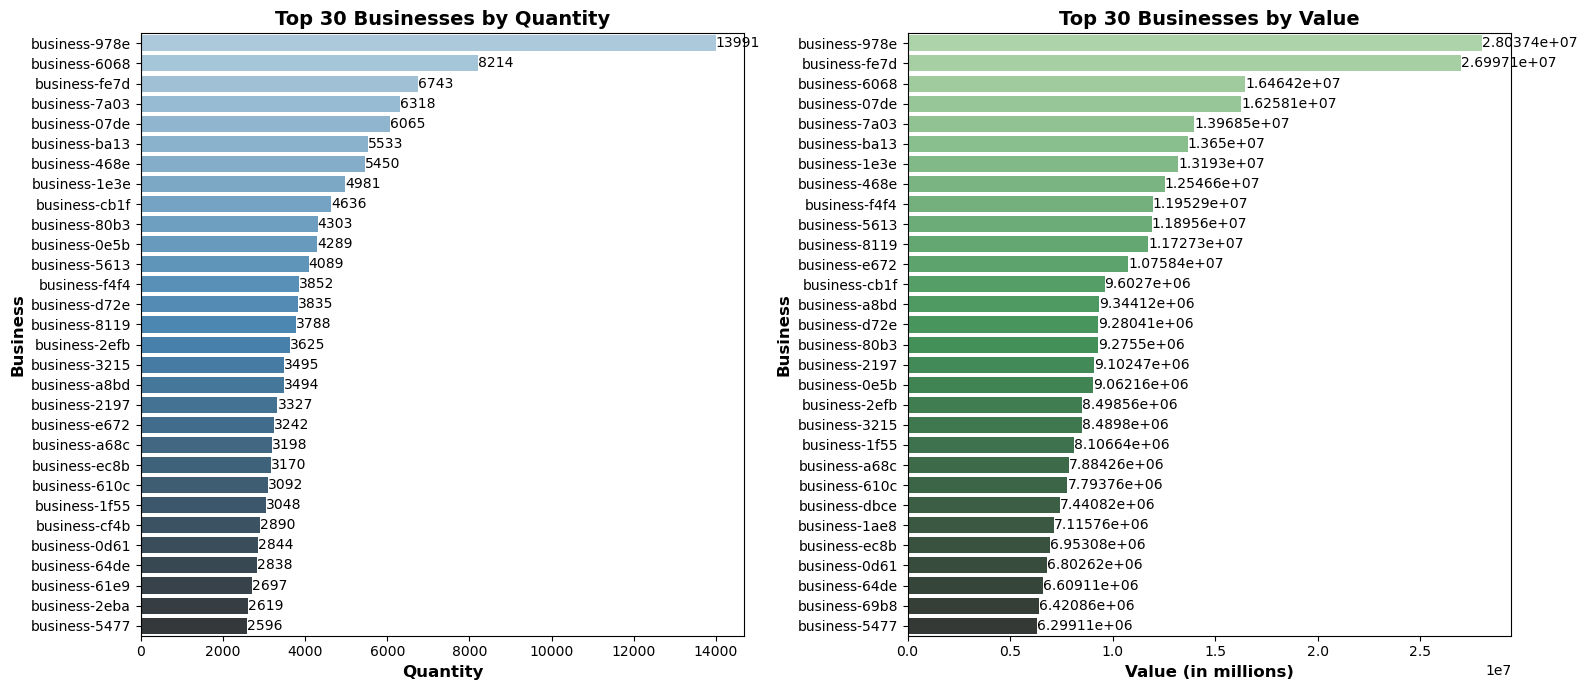

In [25]:
# Sort business_group by Quantity and Value - Top 30*
business_group_sorted_by_quantity = business_group.sort_values('QUANTITY', ascending=False).head(30)
business_group_sorted_by_value = business_group.sort_values('VALUE', ascending=False).head(30)

# Plot for Quantity and Value 
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot for Quantity
sns.barplot(data=business_group_sorted_by_quantity, y='ANONYMIZED BUSINESS', x='QUANTITY', ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 30 Businesses by Quantity", fontsize=14, weight='bold')
axes[0].set_xlabel("Quantity", fontsize=12, weight='bold')
axes[0].set_ylabel("Business", fontsize=12, weight='bold')
axes[0].bar_label(axes[0].containers[0], fontsize=10)

# Plot for Value
sns.barplot(data=business_group_sorted_by_value, y='ANONYMIZED BUSINESS', x='VALUE', ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 30 Businesses by Value", fontsize=14, weight='bold')
axes[1].set_xlabel("Value (in millions)", fontsize=12, weight='bold')
axes[1].set_ylabel("Business", fontsize=12, weight='bold')
axes[1].bar_label(axes[1].containers[0], fontsize=10)

plt.tight_layout()
plt.show();

### (b) Trends Over Time

steps:
- Group the data by Month-Year and calculate the total Quantity and Value for each month.
- Plot the time series for both Quantity and Value to see seasonal patterns/changes in sales performance.

In [26]:
# Group total Quantity and Value by 'Month-Year column'
monthly_trend = data.groupby('Month-Year').agg(
    {'QUANTITY':'sum','VALUE':'sum'}).reset_index()

# Convert 'Month-Year' to datetime format
monthly_trend['Month-Year'] = pd.to_datetime(monthly_trend['Month-Year'], format='%B %Y')
#sort by month-year
monthly_trend = monthly_trend.sort_values(by='Month-Year')
monthly_trend.head()

,Month-Year,QUANTITY,VALUE
4,2024-01-01,67526,"185,626,186.00"
3,2024-02-01,44063,"126,579,702.00"
7,2024-03-01,45381,"116,000,676.00"
0,2024-04-01,50554,"122,110,750.00"
8,2024-05-01,69551,"168,781,502.00"


In [27]:
# check the datatypes
monthly_trend.dtypes

Month-Year    datetime64[ns]
QUANTITY               int64
VALUE                float64
dtype: object

**Time series plot**

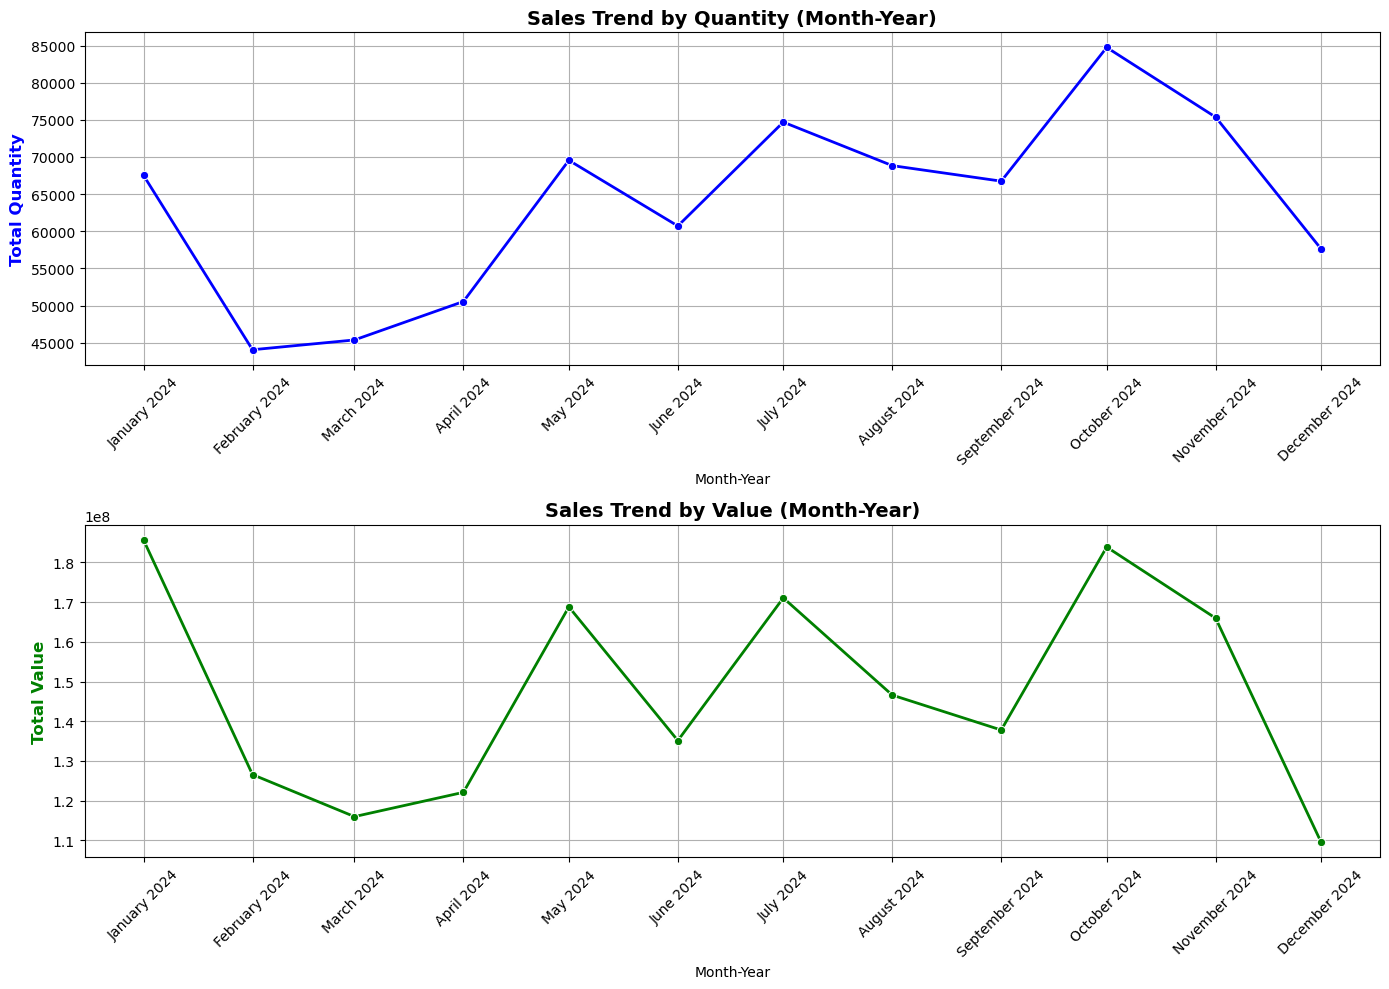

In [28]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 10))

# Plot for Quantity
plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_trend, x='Month-Year', y='QUANTITY', marker='o', color='blue', linewidth=2)
plt.title('Sales Trend by Quantity (Month-Year)', fontsize=14, fontweight='bold')
plt.ylabel('Total Quantity', fontsize=12, fontweight='bold', color='blue')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Value
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_trend, x='Month-Year', y='VALUE', marker='o', color='green', linewidth=2)
plt.title('Sales Trend by Value (Month-Year)', fontsize=14, fontweight='bold')
plt.ylabel('Total Value', fontsize=12, fontweight='bold', color='green')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to show the Month names
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show();

### (c) Performance Analysis

**i. Top 5 most frequently purchased products based on Quantity**

In [29]:
top_products = data.groupby('ANONYMIZED PRODUCT').agg({'QUANTITY':'sum'}).reset_index()

# sort 'Quantity' in a descending order
top_5_products = top_products.sort_values('QUANTITY', ascending=False).head(5)

# view the top 5 products
top_5_products

,ANONYMIZED PRODUCT,QUANTITY
338,product-66e0,46957
750,product-e805,42602
476,product-8f75,37566
127,product-29ee,35940
213,product-4156,28487


**ii. Top 5 most valuable products based on Value**

In [30]:
top_valuable_products = data.groupby('ANONYMIZED PRODUCT').agg({'VALUE':'sum'}).reset_index()

# sort 'Value' in a descending order
top_5_valuable_products = top_valuable_products.sort_values('VALUE', ascending=False).head(5)

# view the top 5 Valuable products
top_5_valuable_products

,ANONYMIZED PRODUCT,VALUE
750,product-e805,"262,787,281.00"
476,product-8f75,"158,797,460.00"
338,product-66e0,"70,704,225.00"
127,product-29ee,"68,248,274.00"
213,product-4156,"56,956,007.00"


# SECTION 3: Advanced Analysis.

### (a) Customer Segmentation

Step 1:
- Group Data by Business: Calculate the total quantity, total value, and transaction frequency for each anonymized business.

- Prepare the Data: We’ll create a new DataFrame with the selected features.

In [31]:
# Grouping by 'ANONYMIZED BUSINESS' to get the total Quantity, total Value, and Frequency of transactions
business_segmentation = data.groupby('ANONYMIZED BUSINESS').agg(
    {'QUANTITY': 'sum','VALUE': 'sum','DATE': 'count'}).reset_index()

# Renaming the 'DATE' column to 'Frequency' for clarity
business_segmentation.rename(columns={'DATE': 'FREQUENCY'}, inplace=True)

# first 5 rows
business_segmentation.head()

,ANONYMIZED BUSINESS,QUANTITY,VALUE,FREQUENCY
0,business-0000,8,"10,445.00",8
1,business-0005,1,"2,645.00",1
2,business-0029,26,"77,340.00",6
3,business-003d,98,"221,761.00",31
4,business-0072,127,"225,056.00",101


Step 2: Feature Scaling
- Since the features {Quantity, Value, and Frequency} have different scales, we’ll normalize them so that K-Means clustering can work effectively.

In [32]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
business_segmentation_scaled = business_segmentation.copy()
business_segmentation_scaled[['QUANTITY', 'VALUE', 'FREQUENCY']] = scaler.fit_transform(business_segmentation[['QUANTITY', 'VALUE', 'FREQUENCY']])

# Display the scaled data
business_segmentation_scaled.head()

,ANONYMIZED BUSINESS,QUANTITY,VALUE,FREQUENCY
0,business-0000,-0.32,-0.30,-0.41
1,business-0005,-0.33,-0.31,-0.45
2,business-0029,-0.28,-0.25,-0.42
3,business-003d,-0.13,-0.12,-0.25
4,business-0072,-0.07,-0.12,0.22


`The features have been successfully scaled`

Step 3: Apply K-Means Clustering
- Now, we'll apply K-Means clustering to segment the businesses into different groups based on their purchasing behavior. Using 3 clusters for High Value, Medium Value, and Low Value businesses.

In [33]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
business_segmentation_scaled['Cluster'] = kmeans.fit_predict(business_segmentation_scaled[['QUANTITY', 'VALUE', 'FREQUENCY']])

# Adding the cluster label
business_segmentation['Cluster'] = business_segmentation_scaled['Cluster']


**Step 3: Scatter Plot to visualize the segmentation:**

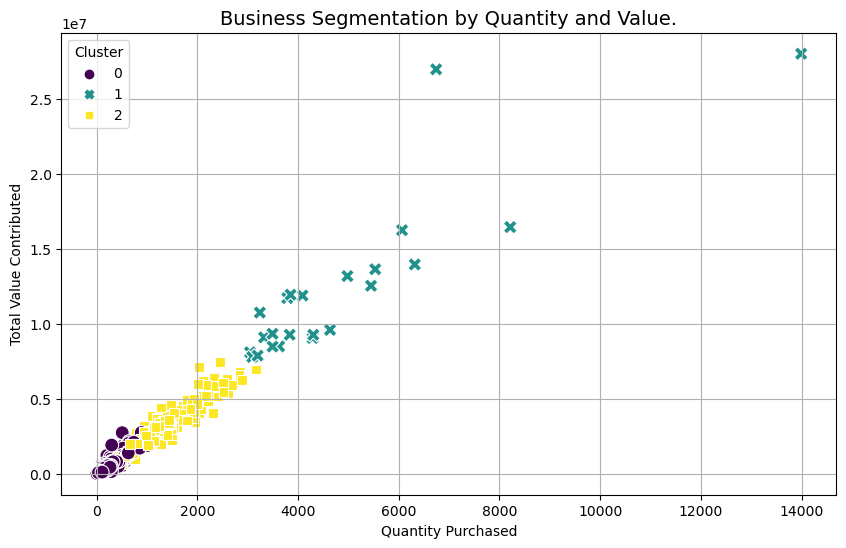

In [34]:
# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=business_segmentation, x='QUANTITY', y='VALUE', hue='Cluster', palette='viridis', style='Cluster', s=100, marker='o')

# Labels and Title
plt.title('Business Segmentation by Quantity and Value.', fontsize=14)
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Value Contributed')

# Show the plot
plt.legend(title='Cluster')
plt.grid(True)
plt.show();


- The above plot shows a clear visual representation of how businesses are segmented based on their purchasing behavior.

**Step 4: Analyze and Provide Recommendations for Engagement**
1. Cluster 0 (Low Value):

Recommendation: Consider offering promotional deals, discounts, or incentives to encourage these businesses to increase their purchasing frequency and quantity. Targeted marketing campaigns may help boost their activity.

2. Cluster 1 (Medium Value):

Recommendation: These businesses exhibit moderate purchasing behavior. To boost their loyalty, consider implementing loyalty programs and exclusive offers. Regular follow-ups and personalized service can also help strengthen the relationship.

3. Cluster 2 (High Value):

Recommendation: These businesses are high-value customers with frequent transactions. Focus on providing premium services, personalized experiences, and exclusive offers. It’s important to retain these businesses by offering them top-tier support and customized solutions.

### (b) Forecasting

- For forecasting the total sales (Value) for the next 3 months, I prefer using ARIMA (AutoRegressive Integrated Moving Average)

i. Data Preprocessing

In [35]:
# Convert 'Month-Year' to datetime
data['Month-Year'] = pd.to_datetime(data['Month-Year'], format='%B %Y')

# Aggregate total sales by Month-Year
monthly_sales = data.groupby('Month-Year')['VALUE'].sum().reset_index()

# Set 'Month-Year' as the index and ensure monthly frequency
monthly_sales.set_index('Month-Year', inplace=True)
monthly_sales = monthly_sales.asfreq('MS')

# First 5 rows 
monthly_sales.head()

,VALUE
Month-Year,
2024-01-01,"185,626,186.00"
2024-02-01,"126,579,702.00"
2024-03-01,"116,000,676.00"
2024-04-01,"122,110,750.00"
2024-05-01,"168,781,502.00"


**Visualize total sales value over time**

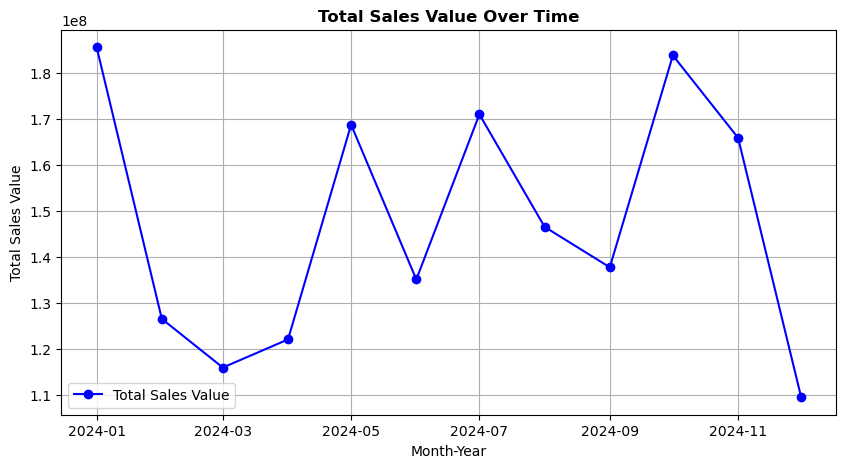

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['VALUE'], label='Total Sales Value', color='blue', marker='o')
plt.title('Total Sales Value Over Time', weight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.legend()
plt.grid(True)
plt.show();

ii. Check for Stationarity

Perform the Augmented Dickey-Fuller (ADF) test to check if the data is stationary. If not, we will difference the data.

In [37]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for Stationarity
def adf_test(series):
    """Perform the Augmented Dickey-Fuller Test for stationarity."""
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is non-stationary. Differencing required.\n")

# Perform ADF Test on original series
print("ADF Test - Original Series:")
adf_test(monthly_sales['VALUE'])

ADF Test - Original Series:
ADF Statistic: -2.6781
p-value: 0.0779
The series is non-stationary. Differencing required.



**Apply Differencing**

The p-value from the ADF test is greater than 0.05 (indicating non-stationarity), we'll difference the data to make it stationary.

In [38]:
# Apply Differencing
monthly_sales['VALUE_diff'] = monthly_sales['VALUE'].diff()

# Perform ADF Test after differencing
print("ADF Test - After Differencing:")
adf_test(monthly_sales['VALUE_diff'].dropna())

ADF Test - After Differencing:
ADF Statistic: -3.0895
p-value: 0.0273
The series is stationary.



`Data is now stationary`

iii. Fitting the ARIMA Model

Once the data is stationary, we can fit an ARIMA model to the differenced data and forecast the next 3 months.

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
best_pdq = (1, 0, 2)
model = ARIMA(monthly_sales['VALUE'], order=best_pdq)
model_fit = model.fit()

# Forecast the next 3 months
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast dates
forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# DataFrame for forecasted values
forecast_df = pd.DataFrame({'VALUE': forecast}, index=forecast_dates)
forecast_df.head()

,VALUE
2025-01-01,"138,535,689.85"
2025-02-01,"152,552,788.42"
2025-03-01,"148,433,059.53"


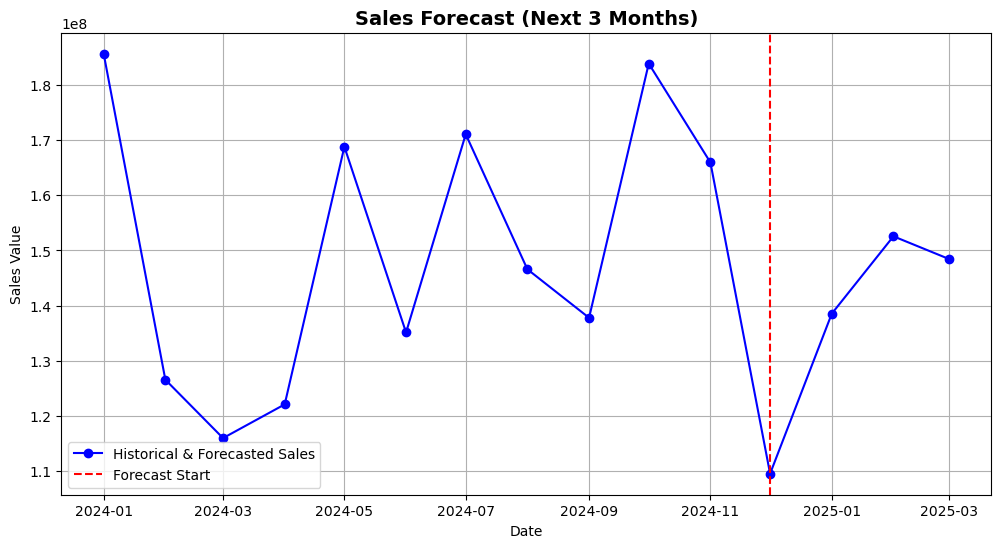

In [40]:
# Merging the Historical and Forecast Data for Smooth Continuity
full_forecast_df = pd.concat([monthly_sales, forecast_df])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(full_forecast_df.index, full_forecast_df['VALUE'], label='Historical & Forecasted Sales', color='blue', marker='o')
plt.axvline(x=monthly_sales.index[-1], linestyle="--", color='red', label="Forecast Start")
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.title('Sales Forecast (Next 3 Months)', fontsize=14, weight='bold')
plt.legend()
plt.grid(True)
plt.show();

### (c) Anomaly Detection

Calculate Moving Average and Standard Deviation: We'll compute the 7-day moving average and standard deviation for both QUANTITY and VALUE columns.

In [41]:
# Step 1: Calculate the 7-day Moving Average and Standard Deviation
data['QUANTITY_MA'] = data['QUANTITY'].rolling(window=7).mean()
data['SALES_VALUE_MA'] = data['VALUE'].rolling(window=7).mean()

data['QUANTITY_STD'] = data['QUANTITY'].rolling(window=7).std()
data['SALES_VALUE_STD'] = data['VALUE'].rolling(window=7).std()

# Step 2: Identify anomalies based on 2 standard deviations
threshold = 2


Identify Anomalies: We'll flag any data points that fall outside the range defined by the moving average (2) standard deviations as anomalies.

In [42]:
# Identify anomalies in Quantity
data['QUANTITY_ANOMALY'] = (data['QUANTITY'] > data['QUANTITY_MA'] + threshold * data['QUANTITY_STD']) | \
                           (data['QUANTITY'] < data['QUANTITY_MA'] - threshold * data['QUANTITY_STD'])

# Identify anomalies in Sales Value
data['SALES_VALUE_ANOMALY'] = (data['VALUE'] > data['SALES_VALUE_MA'] + threshold * data['SALES_VALUE_STD']) | \
                              (data['VALUE'] < data['SALES_VALUE_MA'] - threshold * data['SALES_VALUE_STD'])

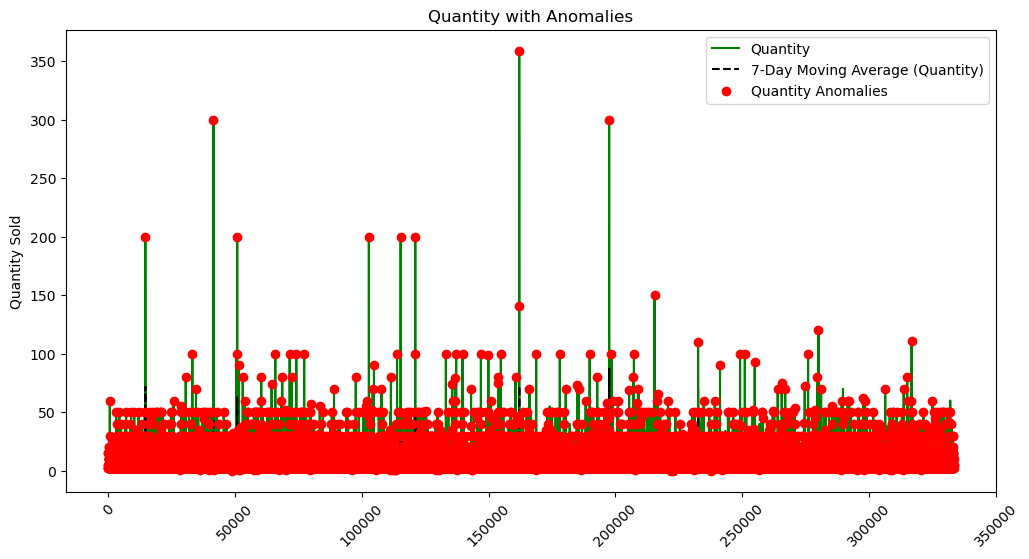

In [43]:
# Plot Quantity and its anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['QUANTITY'], label='Quantity', color='green')
plt.plot(data.index, data['QUANTITY_MA'], label='7-Day Moving Average (Quantity)', color='black', linestyle='--')
plt.scatter(data.index[data['QUANTITY_ANOMALY']], data['QUANTITY'][data['QUANTITY_ANOMALY']], color='red', label='Quantity Anomalies', zorder=5)

plt.title('Quantity with Anomalies')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show();

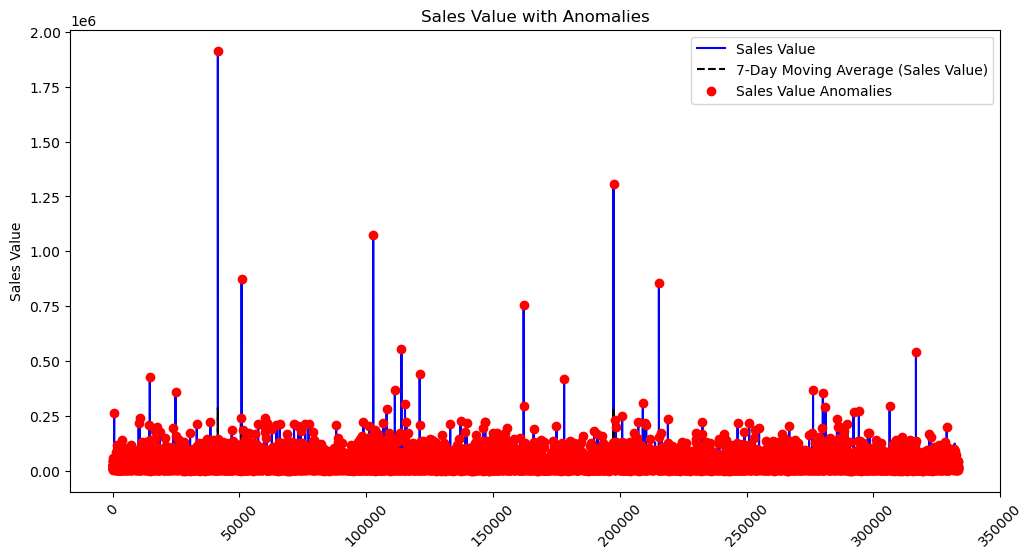

In [44]:
# Plot Sales Value and its anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['VALUE'], label='Sales Value', color='blue')
plt.plot(data.index, data['SALES_VALUE_MA'], label='7-Day Moving Average (Sales Value)', color='black', linestyle='--')
plt.scatter(data.index[data['SALES_VALUE_ANOMALY']], data['VALUE'][data['SALES_VALUE_ANOMALY']], color='red', label='Sales Value Anomalies', zorder=5)

plt.title('Sales Value with Anomalies')
plt.ylabel('Sales Value')
plt.legend()
plt.xticks(rotation=45)
plt.show();

**ii. Explain possible reasons based on the data above.**

Possible Reasons for Anomalies:
1. Seasonality  – Spikes may occur due to holidays, promotions, or peak seasons, while drops may result from off-season periods.
2. Availability of stock – A sharp drop could indicate stock shortages, supply chain disruptions or logistics issues.
3. Pricing Changes – Discounts or price hikes can influence sudden changes in sales volume.
4. Market Trends – External factors such as economic downturns or industry shifts can impact demand.
5. Data Errors – Anomalies may be caused by incorrect data entry, system effects or reporting delays.
6. Competitor Influence – Sudden drops may indicate customers switching to competitors due to better pricing or new product offerings.

### (d) Correlation Analysis.

**i. Examine relationship between Quantity and Value.**

We can use a heatmap to visualize the correlation matrix. The heatmap will display the correlation values between different variables with color intensity indicating the strength of the correlation.

Pearson's correlation coefficient between Quantity and Sales Value = 0.84


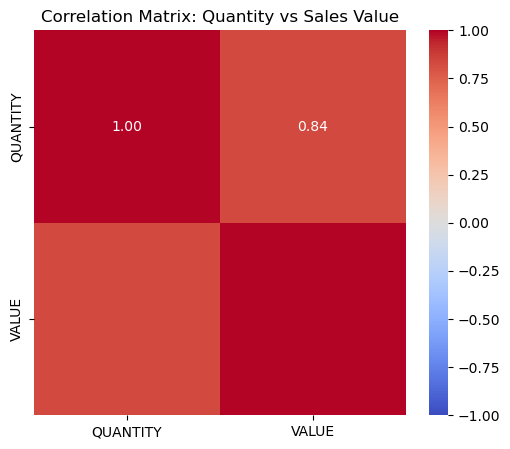

In [45]:
# Calculate Pearson's correlation coefficient
correlation = data[['QUANTITY', 'VALUE']].corr().iloc[0, 1]
print(f"Pearson's correlation coefficient between Quantity and Sales Value = {correlation:.2f}")

# correlation matrix
correlation_matrix = data[['QUANTITY', 'VALUE']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)

# Add title
plt.title('Correlation Matrix: Quantity vs Sales Value')
plt.show();

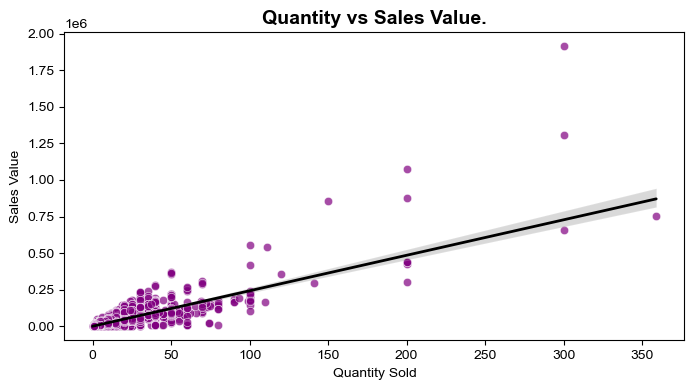

In [46]:
# Scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='QUANTITY', y='VALUE', data=data, color='purple', alpha=0.7)
sns.set_style("whitegrid")

# Adding a linear regression line
sns.regplot(x='QUANTITY', y='VALUE', data=data, scatter=False, color='black', line_kws={"linewidth": 2})

# Labelling
plt.title('Quantity vs Sales Value.', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Value')
plt.show();


**ii. insights into which factors drive sales performance.**

Factors driving the sales performance:

1. Correlation Between Quantity and Sales Value: Higher quantities generally lead to higher sales value, but other factors like unit price and product category can also influence sales.

2. Feature Importance: Machine learning models can identify key factors affecting sales, like unit price, product category, and location.

3. Seasonality: Sales often spike during certain months, influencing both quantity and sales value.

4. Product Category and Location: Certain product categories or locations may contribute more to sales due to demand variations.

5. Unit Price: Price directly impacts sales value; higher-priced items may lead to higher sales value, but pricing sensitivity should also be considered.

6. Promotions/Discounts: Sales may spike during promotional periods, driving increased quantity and sales value.

7. External Factors: Economic conditions and social media trends can cause significant fluctuations in quantity and sales value.

# SECTION 4: Strategic Insights and Recommendations .

### (a) Product Strategy

To maximize revenue and business growth, i will be prioritizing the product category that generates the highest total sales value. This approach ensures that marketing efforts target products with proven demand and financial impact.  


In [47]:
category_sales = data.groupby("ANONYMIZED CATEGORY").agg({"VALUE": "sum", "QUANTITY":"sum"}).reset_index().sort_values(by="VALUE", ascending=False)
category_sales.head()

,ANONYMIZED CATEGORY,VALUE,QUANTITY
25,category-75,"544,658,700.00",151330
26,category-76,"344,939,553.00",71719
18,category-120,"319,178,743.00",169715
0,category-100,"134,902,751.00",76824
17,category-119,"103,454,819.00",68332


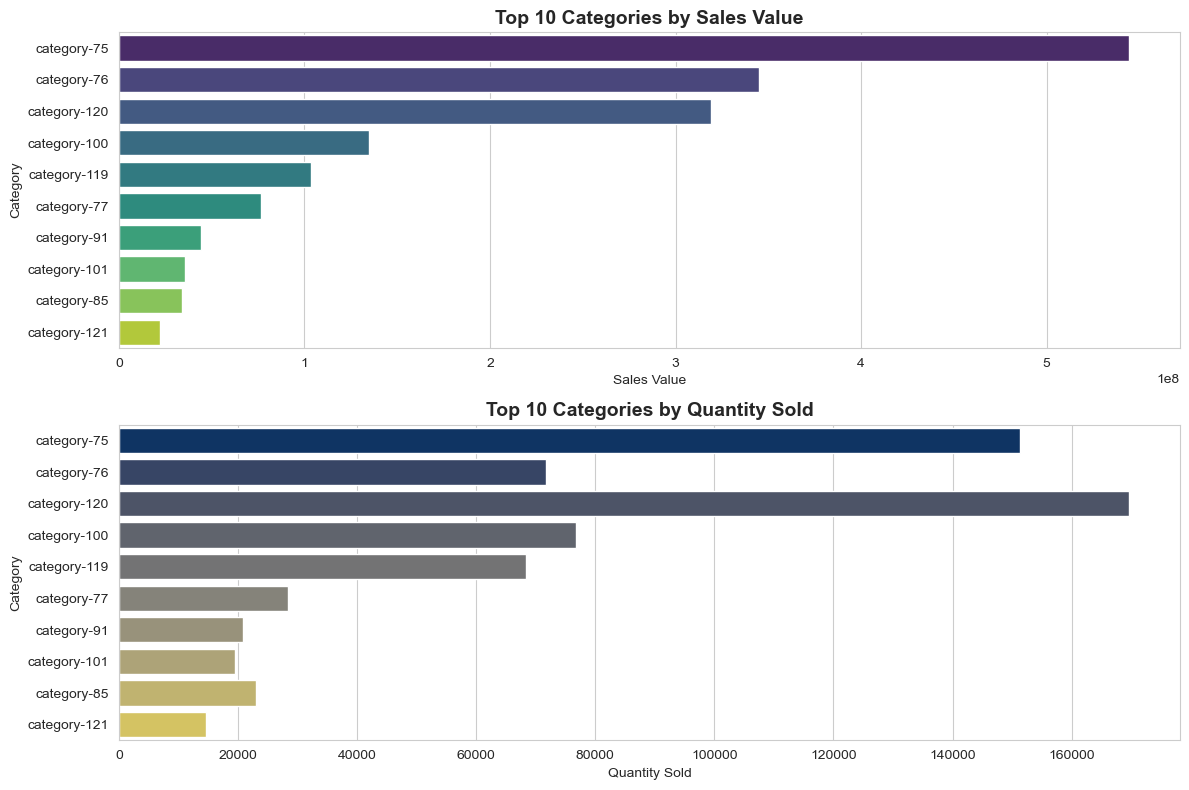

In [48]:
# Sort by 'VALUE' -  top 10 categories
category_sales = category_sales.sort_values(by="VALUE", ascending=False).head(10)

# Plot VALUE
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='VALUE', y='ANONYMIZED CATEGORY', data=category_sales, palette='viridis')
plt.title("Top 10 Categories by Sales Value", fontsize=14, fontweight='bold')
plt.xlabel('Sales Value')
plt.ylabel('Category')

# Plot QUANTITY
plt.subplot(2, 1, 2)
sns.barplot(x='QUANTITY', y='ANONYMIZED CATEGORY', data=category_sales, palette='cividis')
plt.title("Top 10 Categories by Quantity Sold", fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Category')

# Display the 2 plots
plt.tight_layout()
plt.show();

Analyzed total sales revenue across all product categories and identified the highest-performing category based on cumulative sales value. This metric reflects both **high demand** and **strong pricing power**, making it a key driver of overall business performance.  


<Figure size 800x400 with 0 Axes>

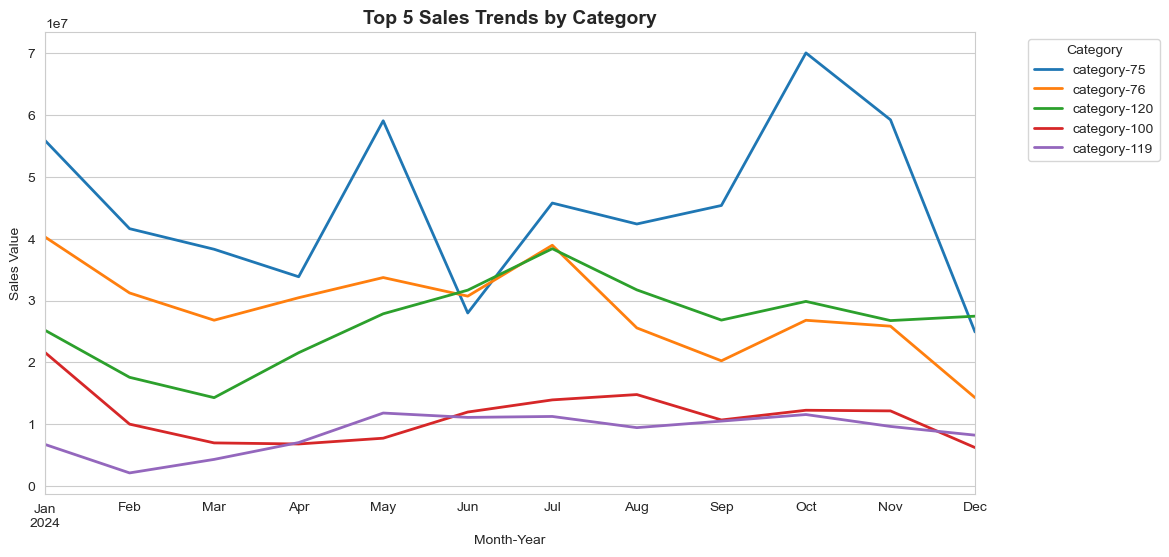

In [49]:
# Group data by Month-Year and Category, summing the values
category_trends = data.groupby(["Month-Year", "ANONYMIZED CATEGORY"])["VALUE"].sum().unstack()

# top 5 categories by total sales
top_categories = category_trends.sum().sort_values(ascending=False).head(5).index

top_category_trends = category_trends[top_categories]

# Plot the trends -> for the top 5 categories
plt.figure(figsize=(8, 4))
top_category_trends.plot(figsize=(12,6), linewidth=2)

# title and labels
plt.title("Top 5 Sales Trends by Category", fontsize=14, fontweight='bold')
plt.xlabel("Month-Year")
plt.ylabel("Sales Value")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show();

`Based on these analyses, the top-performing category is [Category-75]`  
**Justification for Prioritizing Category-75 in Marketing Campaigns**
1. Highest Revenue Generator - Category-75 leads with a total sales value of 544.66M, making it the top contributor to overall revenue.

2. Strong Demand (High Quantity Sold) - 151,330 units sold, indicating strong customer preference and sustained market demand.

3. Consistent Performance Over Time - A good trend, especially during peak seasons, suggests customer loyalty and repeat purchases within this category.

4. Opportunity for Further Growth - Despite already being the highest revenue earner, targeted marketing efforts could further boost sales, especially if seasonal trends support increased demand.

### (b) Customer Retention

- Steps to Identify Businesses with Reduced Purchase Frequency :
1. Calculate Purchase Frequency
2. Count the number of purchases made by each business over time.
3. Compare purchase frequency in recent months vs. previous months to identify declining trends.

In [50]:
# Group by business and month-year to count purchases
purchase_trend = data.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).agg({'QUANTITY':'count'}).reset_index()

# Calculate rolling average or percentage change in purchases
purchase_trend['PURCHASE_CHANGE'] = purchase_trend.groupby('ANONYMIZED BUSINESS')['QUANTITY'].pct_change()
purchase_trend['PURCHASE_CHANGE'] 

0         NaN
1       -0.50
2        2.00
3       -0.67
4        0.00
         ... 
20678   -0.50
20679     NaN
20680    0.39
20681    0.92
20682   -0.67
Name: PURCHASE_CHANGE, Length: 20683, dtype: float64

- Businesses with a significant drop in purchase frequency. I'll Define a threshold for decline - more than 30% drop in purchases

In [51]:
# Define a threshold
declining_customers = purchase_trend[purchase_trend['PURCHASE_CHANGE'] < threshold]['ANONYMIZED BUSINESS'].unique()
declining_customers

array(['business-0000', 'business-003d', 'business-0072', ...,
       'business-ffb1', 'business-ffd2', 'business-ffff'], dtype=object)

**Strategies to Re-engage Inactive Customers**
1. Personalized Offers and Discounts - Provide targeted discounts or promotions to incentivize repeat purchases.
2. Loyalty and Reward Programs - Offer reward points or cashback for frequent buyers.
3. Customer Feedback and Engagement - Conduct surveys to understand why purchases declined.Also engage through personalized emails or calls to address concerns.
4. Flexible Payment and Credit Options - Offer installment payment plans for bulk purchases. Introduce credit options to ease financial constraints.
5. Bulk Order Discounts - Provide bulk purchase incentives i.e during peak demand periods.

### (c) Operational Efficiency

i. Visual for seasonal demand trends

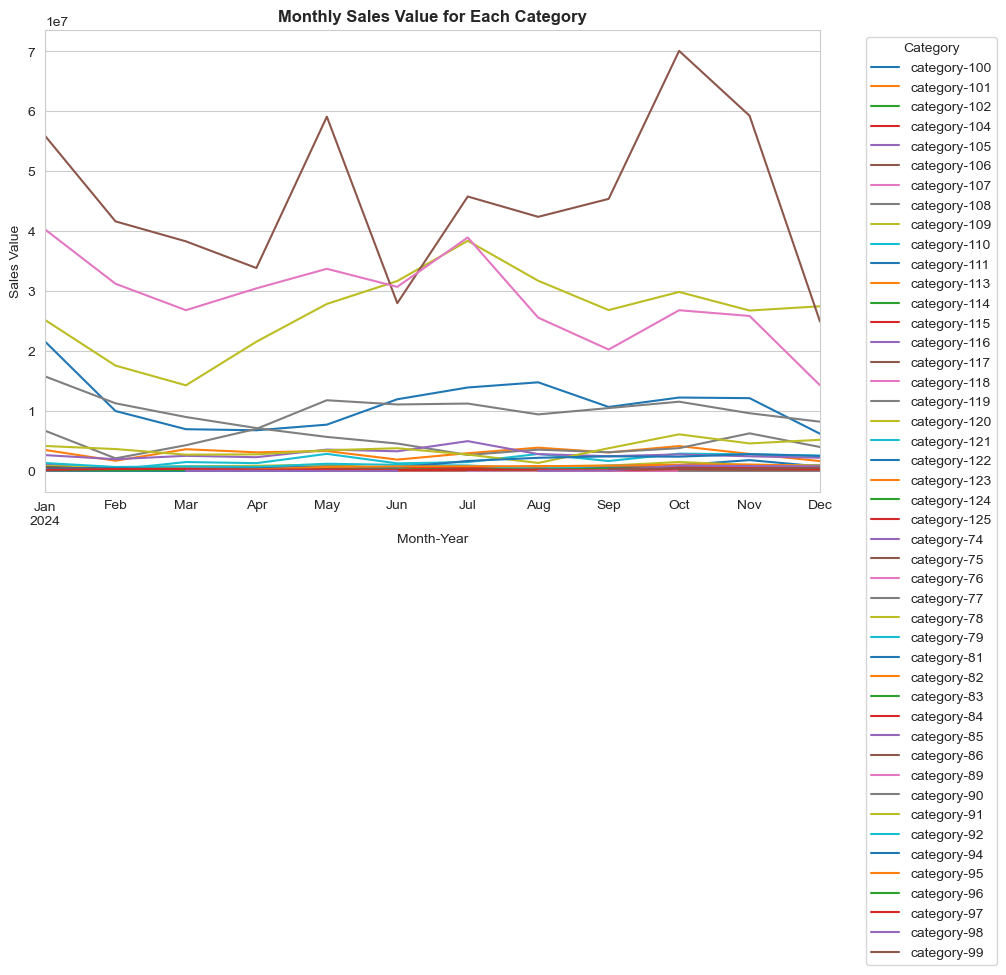

In [52]:
# Aggregate data by 'Month-Year' and 'ANONYMIZED CATEGORY' to show sales by category and month
monthly_category_sales = data.groupby(['Month-Year', 'ANONYMIZED CATEGORY'])['VALUE'].sum().unstack()

# Plot 
monthly_category_sales.plot(figsize=(10, 6))
plt.title('Monthly Sales Value for Each Category', weight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Sales Value')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show();

ii. **Inventory and Supply Chain Improvements**
1. Demand Forecasting for Inventory Optimization 
- Use historical sales data to predict future demand, ensuring optimal stock levels. Identify seasonal trends, such as peak demand periods, and adjust inventory accordingly.  
Actionable Step: Set up an automated demand forecasting model using moving averages or time series models such as Prophet or ARIMA.
2. Reduce Stockouts and Overstocking
- Stockouts: Pinpoint products that are regularly out of stock and increase the frequency of reorder.
Overstocking: Identify slow-moving items and decrease procurement accordingly to save on holding costs.  
Actionable Step: Establish an inventory alert system that monitors stock levels in real time.
3. Supplier Performance
- Analyze supplier delivery times and reliability.
Identify the suppliers from whom frequent delays have been experienced and explore alternative sourcing options.  
Actionable Step: Negotiate better delivery schedules or diversification of suppliers to reduce delays.
4. Distribution Efficiency
- Optimize warehouse storage by understanding demand patterns of the products.
Use ABC Analysis to classify the products by their importance: A-high value and C-low value.  
Actionable Step: First-in, first-out system to minimize expired or obsolete stock.
5. Data-Driven Pricing
- Have pricing strategies adjusted with changes in demand.
Apply discounts on slow-moving products and bundle fast-moving products for better sales.  
Actionable Step: Dynamic pricing strategy based on real-time sales trends.